# Interactive AI Analytics Dashboard

This notebook demonstrates advanced AI/ML visualization techniques with real-time data processing and interactive controls. Perfect for showing how analytics and AI can drive business insights.

In [1]:
# Install required packages if needed
# !pip install numpy pandas matplotlib seaborn plotly scikit-learn ipywidgets

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import warnings
warnings.filterwarnings('ignore')

# Style settings
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14

print("Libraries loaded successfully!")

Libraries loaded successfully!


# 1. Data Loading and Exploration

Let's load the MNIST handwritten digits dataset and explore it with interactive visualizations.

Dataset shape: (70000, 784)
Number of classes: 10
Distribution of digits:
digit
0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: count, dtype: int64


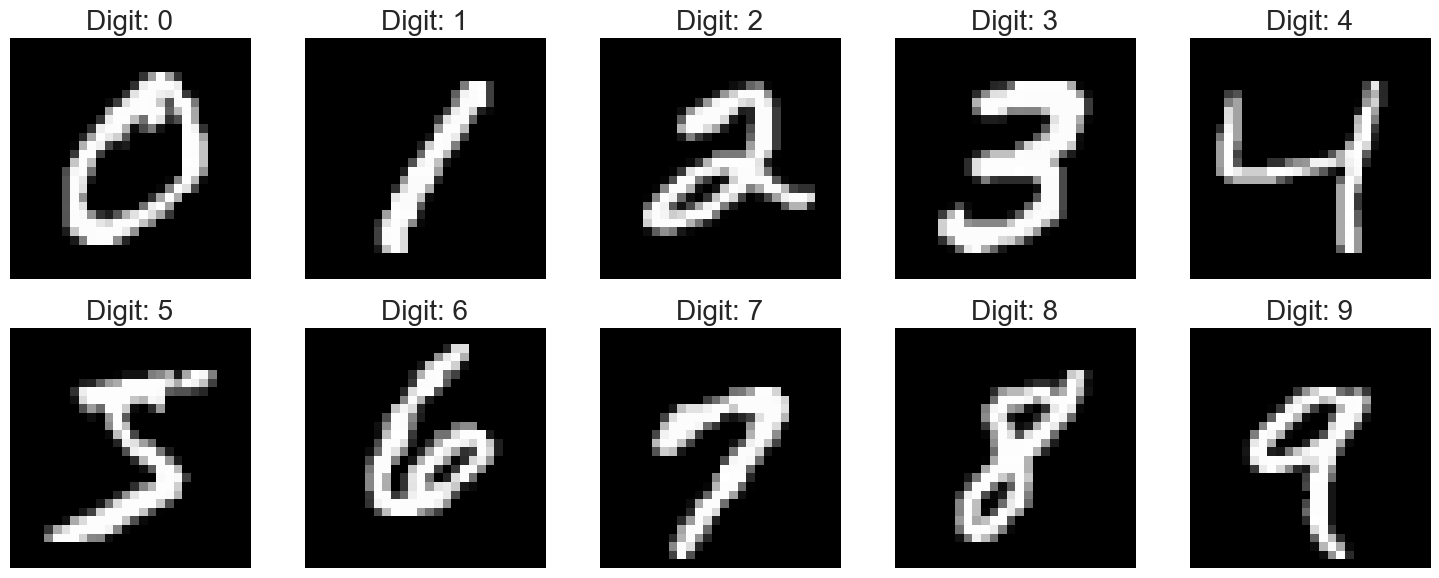

In [2]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data.astype('float32').to_numpy()  # Convert to numpy array
y = mnist.target.astype('int').to_numpy()    # Convert to numpy array

# Scale data to [0, 1]
X = X / 255.0

# Create a dataframe for easier manipulation
df = pd.DataFrame(X)
df['digit'] = y

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Distribution of digits:\n{df['digit'].value_counts().sort_index()}")

# Display a sample of the digits
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    # Get a random index for each digit (0-9)
    indices = np.where(y == i)[0]
    if len(indices) > 0:
        idx = indices[0]
        
        # Reshape the flattened image to 28x28
        img = X[idx].reshape(28, 28)
        
        # Display the image
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Digit: {i}")
        ax.axis('off')
    else:
        ax.set_title(f"No examples of digit {i}")
        ax.axis('off')

plt.tight_layout()
plt.show()

# 2. Interactive Digit Viewer

Create an interactive widget to view any digit from the dataset with real-time controls.

In [3]:
# Create interactive digit viewer
def view_digit(digit_class=5, instance_num=0, cmap='viridis'):
    # Get all indices for the selected digit class
    indices = np.where(y == digit_class)[0]
    
    if len(indices) == 0:
        print(f"No examples of digit {digit_class} found.")
        return None
    
    # Make sure the instance_num is valid
    instance_num = min(instance_num, len(indices) - 1)
    
    # Get the selected instance
    idx = indices[instance_num]
    
    # Reshape the image
    img = X[idx].reshape(28, 28)
    
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Display the image
    img_plot = ax1.imshow(img, cmap=cmap)
    ax1.set_title(f"Digit: {digit_class}, Instance: {instance_num}")
    ax1.axis('off')
    fig.colorbar(img_plot, ax=ax1, shrink=0.7)
    
    # Display the heatmap version
    sns.heatmap(img, ax=ax2, cmap=cmap, cbar=False)
    ax2.set_title("Heatmap View")
    ax2.axis('off')
    
    # Additional info
    pixel_sum = np.sum(img)
    non_zero = np.count_nonzero(img)
    plt.suptitle(f"Sum of pixel values: {pixel_sum:.2f}, Non-zero pixels: {non_zero}", fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Return image data for potential further use
    return img

# Create interactive widget
digit_selector = widgets.IntSlider(value=5, min=0, max=9, step=1, description='Digit:')
instance_selector = widgets.IntSlider(value=0, min=0, max=1000, step=1, description='Instance:')
cmap_selector = widgets.Dropdown(
    options=['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'gray', 'hot', 'cool'],
    value='viridis',
    description='Colormap:'
)

# Create the interactive view
interact(view_digit, digit_class=digit_selector, instance_num=instance_selector, cmap=cmap_selector)

interactive(children=(IntSlider(value=5, description='Digit:', max=9), IntSlider(value=0, description='Instanc…

<function __main__.view_digit(digit_class=5, instance_num=0, cmap='viridis')>

# 3. Dimensionality Reduction and Visualization

Let's use PCA and t-SNE to visualize the high-dimensional MNIST data in a more interpretable way.

In [4]:
# Sample a subset of the data to speed up computation
n_samples = 2000
random_indices = np.random.choice(X.shape[0], min(n_samples, X.shape[0]), replace=False)
X_sample = X[random_indices]
y_sample = y[random_indices]

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # Reduce to 50 components first
X_pca = pca.fit_transform(X_sample)

# Apply t-SNE on top of PCA results for better visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)  # Reduced iterations for speed
X_tsne = tsne.fit_transform(X_pca)

# Create a dataframe for the visualization
df_viz = pd.DataFrame({
    'x': X_tsne[:, 0],
    'y': X_tsne[:, 1],
    'digit': y_sample
})

# Plot using Plotly for interactive visualization
fig = px.scatter(
    df_viz, x='x', y='y', color='digit',
    color_discrete_sequence=px.colors.qualitative.Bold,
    title='t-SNE Visualization of MNIST Digits',
    labels={'digit': 'Digit Class'},
    hover_data=['digit']
)

fig.update_layout(
    width=1000,
    height=700,
    template='plotly_white',
    legend_title_text='Digit Class',
)

# Add custom labels and tooltips
fig.update_traces(
    marker=dict(size=10, opacity=0.7, line=dict(width=1, color='DarkSlateGrey')),
    selector=dict(mode='markers')
)

fig.show()

# 4. Real-time Machine Learning Model Training and Evaluation

Let's build an interactive model training and evaluation dashboard.

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define a function to train a model with adjustable parameters
def train_model(n_estimators=100, max_depth=10, min_samples_split=2, max_features='sqrt'):
    # Create the classifier
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )
    
    # Fit the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the results
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=("Confusion Matrix", "Feature Importance"),
        specs=[[{"type": "heatmap"}, {"type": "bar"}]]
    )
    
    # Add confusion matrix heatmap
    fig.add_trace(
        go.Heatmap(
            z=cm,
            x=[str(i) for i in range(10)],
            y=[str(i) for i in range(10)],
            hoverongaps=False,
            colorscale='Viridis',
            showscale=False,
            text=cm,
            texttemplate="%{text}",
        ),
        row=1, col=1
    )
    
    # Add feature importance bar chart (top 20 features)
    feature_importances = clf.feature_importances_
    n_features = 20
    indices = np.argsort(feature_importances)[-n_features:]
    
    fig.add_trace(
        go.Bar(
            y=[f"Feat {i}" for i in indices],
            x=feature_importances[indices],
            orientation='h',
            marker=dict(
                color=feature_importances[indices],
                colorscale='Viridis',
                showscale=False
            )
        ),
        row=1, col=2
    )
    
    # Update layout
    fig.update_layout(
        title_text=f"Model Accuracy: {accuracy:.4f}",
        height=600,
        width=1200,
        showlegend=False,
    )
    
    fig.update_xaxes(title_text="Predicted", row=1, col=1)
    fig.update_yaxes(title_text="Actual", row=1, col=1)
    fig.update_xaxes(title_text="Importance", row=1, col=2)
    fig.update_yaxes(title_text="Features", row=1, col=2)
    
    fig.show()
    
    # Test 5 random samples
    test_indices = np.random.randint(0, X_test.shape[0], 5)
    X_random = X_test[test_indices]
    y_random = y_test[test_indices]
    y_random_pred = clf.predict(X_random)
    
    # Display the results
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    
    for i, ax in enumerate(axes):
        img = X_random[i].reshape(28, 28)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"True: {y_random[i]}\nPred: {y_random_pred[i]}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return clf, accuracy

# Create interactive widgets
n_estimators_widget = widgets.IntSlider(
    value=100, min=10, max=200, step=10,
    description='Trees:',
    style={'description_width': 'initial'}
)

max_depth_widget = widgets.IntSlider(
    value=10, min=1, max=30, step=1,
    description='Max Depth:',
    style={'description_width': 'initial'}
)

min_samples_split_widget = widgets.IntSlider(
    value=2, min=2, max=10, step=1,
    description='Min Samples:',
    style={'description_width': 'initial'}
)

max_features_widget = widgets.Dropdown(
    options=['sqrt', 'log2', None],
    value='sqrt',
    description='Max Features:',
    style={'description_width': 'initial'}
)

# Create the interactive interface
interact_manual(
    train_model,
    n_estimators=n_estimators_widget,
    max_depth=max_depth_widget,
    min_samples_split=min_samples_split_widget,
    max_features=max_features_widget
)

interactive(children=(IntSlider(value=100, description='Trees:', max=200, min=10, step=10, style=SliderStyle(d…

<function __main__.train_model(n_estimators=100, max_depth=10, min_samples_split=2, max_features='sqrt')>

# 5. Interactive Digit Recognition App

Create a fully interactive application that lets you visualize digit recognition in real-time.

In [6]:
# Train a default model for the interactive app
def train_default_model():
    clf = RandomForestClassifier(
        n_estimators=50,  # Reduced for speed
        max_depth=10,
        random_state=42,
        n_jobs=-1
    )
    # Print status update
    print("Training model...")
    clf.fit(X_train, y_train)
    print("Model training complete!")
    return clf

# Create a prediction function
def predict_digit(model, instance_idx):
    # Get the digit
    img = X_test[instance_idx].reshape(1, -1)
    
    # Make prediction
    prediction = model.predict(img)[0]
    probabilities = model.predict_proba(img)[0]
    
    return prediction, probabilities

# Create a visualization function for the interactive app
def interactive_digit_recognition(instance_idx=0, show_probs=True):
    # Check if model exists
    global clf
    try:
        clf
    except NameError:
        print("Training default model...")
        clf = train_default_model()
        print("Model trained!")
    
    # Make sure instance index is valid
    instance_idx = min(instance_idx, len(X_test)-1)
    instance_idx = max(0, instance_idx)
    
    # Get image data
    img = X_test[instance_idx].reshape(28, 28)
    true_label = y_test[instance_idx]
    
    # Make prediction
    predicted_label, probabilities = predict_digit(clf, instance_idx)
    
    # Create the visualization
    if show_probs:
        # Create a figure with 2 subplots
        fig = plt.figure(figsize=(12, 5))
        
        # Add digit plot
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.imshow(img, cmap='gray')
        ax1.set_title(f"True: {true_label}, Predicted: {predicted_label}")
        ax1.axis('off')
        
        # Add probability plot
        ax2 = fig.add_subplot(1, 2, 2)
        bars = ax2.bar(
            range(10), 
            probabilities, 
            color=plt.cm.plasma(probabilities)
        )
        ax2.set_xticks(range(10))
        ax2.set_xlabel('Digit')
        ax2.set_ylabel('Probability')
        ax2.set_title('Prediction Probabilities')
        
        # Highlight the true and predicted labels 
        if 0 <= true_label < 10 and 0 <= predicted_label < 10:
            bars[true_label].set_edgecolor('green')
            bars[true_label].set_linewidth(2)
            bars[predicted_label].set_edgecolor('red')
            bars[predicted_label].set_linewidth(2)
        
            # Add a legend
            from matplotlib.patches import Patch
            legend_elements = [
                Patch(facecolor='none', edgecolor='green', label='True Label'),
                Patch(facecolor='none', edgecolor='red', label='Predicted Label')
            ]
            ax2.legend(handles=legend_elements, loc='upper right')
        
        plt.tight_layout()
        plt.show()
    else:
        # Just show the digit
        plt.figure(figsize=(6, 6))
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()
    
    return probabilities

# Create interactive widgets
instance_selector = widgets.IntSlider(
    value=0, 
    min=0, 
    max=len(X_test)-1, 
    step=1,
    description='Test Instance:',
    style={'description_width': 'initial'}
)

show_probs_selector = widgets.Checkbox(
    value=True,
    description='Show Probabilities',
    style={'description_width': 'initial'}
)

next_button = widgets.Button(
    description='Next Random Instance',
    button_style='info',
    tooltip='Select a random test instance'
)

output = widgets.Output()

def on_next_button_clicked(b):
    with output:
        output.clear_output()
        # Select random instance
        random_idx = np.random.randint(0, len(X_test))
        instance_selector.value = random_idx

next_button.on_click(on_next_button_clicked)

# Layout the widgets
controls = widgets.VBox([instance_selector, show_probs_selector, next_button])
dashboard = widgets.VBox([controls, output])

# Define the interactive function
def update_output(*args):
    with output:
        output.clear_output()
        interactive_digit_recognition(instance_selector.value, show_probs_selector.value)

# Set up the widget interactions
instance_selector.observe(update_output, names='value')
show_probs_selector.observe(update_output, names='value')

# Display the dashboard
display(dashboard)

# Initial update
with output:
    interactive_digit_recognition(instance_selector.value, show_probs_selector.value)

# 6. Model Performance Dashboard

Create an interactive dashboard to analyze model performance across different digit classes.

In [7]:
# Create a function to analyze model performance
def analyze_performance():
    # Check if model exists
    global clf
    try:
        clf
    except NameError:
        print("Training default model...")
        clf = train_default_model()
        print("Model trained!")
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate per-class accuracy
    class_accuracy = {}
    for digit in range(10):
        mask = (y_test == digit)
        if mask.sum() > 0:  # Avoid division by zero
            class_accuracy[digit] = accuracy_score(y_test[mask], y_pred[mask])
        else:
            class_accuracy[digit] = 0
    
    # Find the most challenging pairs
    cm = confusion_matrix(y_test, y_pred)
    cm_copy = cm.copy()
    np.fill_diagonal(cm_copy, 0)  # Zero out the diagonal to find off-diagonal maximums
    
    # Create visualization with plotly
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            "Per-Class Accuracy", 
            "Confusion Matrix",
            "Most Confused Digit Pairs",
            "Accuracy vs. Sample Count"
        ),
        specs=[
            [{"type": "bar"}, {"type": "heatmap"}],
            [{"type": "bar"}, {"type": "scatter"}]
        ],
        vertical_spacing=0.1,
        horizontal_spacing=0.1
    )
    
    # Add per-class accuracy
    fig.add_trace(
        go.Bar(
            x=list(class_accuracy.keys()),
            y=list(class_accuracy.values()),
            marker=dict(
                color=list(class_accuracy.values()),
                colorscale='Viridis',
                showscale=False
            ),
            text=[f"{v:.2f}" for v in class_accuracy.values()],
            textposition='auto',
            name="Per-Class Accuracy"
        ),
        row=1, col=1
    )
    
    # Add confusion matrix
    fig.add_trace(
        go.Heatmap(
            z=confusion_matrix(y_test, y_pred),
            x=[str(i) for i in range(10)],
            y=[str(i) for i in range(10)],
            colorscale='Viridis',
            showscale=False,
            name="Confusion Matrix"
        ),
        row=1, col=2
    )
    
    # Find the top confused pairs
    confused_pairs = []
    for i in range(10):
        for j in range(10):
            if i != j:
                confused_pairs.append((i, j, cm_copy[i, j]))
    
    # Sort by confusion count
    confused_pairs.sort(key=lambda x: x[2], reverse=True)
    
    # Take top 10 pairs
    top_confused = confused_pairs[:10]
    
    # Add bar chart for most confused pairs
    if top_confused:
        fig.add_trace(
            go.Bar(
                x=[f"{t[0]}->{t[1]}" for t in top_confused],
                y=[t[2] for t in top_confused],
                marker=dict(
                    color=[t[2] for t in top_confused],
                    colorscale='Viridis',
                    showscale=False
                ),
                text=[f"{t[2]}" for t in top_confused],
                textposition='auto',
                name="Most Confused Pairs"
            ),
            row=2, col=1
        )
    
    # Add scatter plot for accuracy vs sample count
    class_counts = pd.Series(y_test).value_counts().sort_index()
    
    fig.add_trace(
        go.Scatter(
            x=class_counts.values,
            y=[class_accuracy[i] for i in range(10) if i in class_accuracy],
            mode='markers+text',
            text=[str(i) for i in range(10) if i in class_accuracy],
            textposition="top center",
            marker=dict(
                size=15,
                color=list(range(10)),
                colorscale='Viridis',
                showscale=False
            ),
            name="Accuracy vs Count"
        ),
        row=2, col=2
    )
    
    # Update layout
    fig.update_layout(
        title_text=f"Model Performance Analysis (Overall Accuracy: {accuracy:.4f})",
        height=800,
        width=1200,
        showlegend=False,
    )
    
    # Update axes
    fig.update_xaxes(title_text="Digit Class", row=1, col=1)
    fig.update_yaxes(title_text="Accuracy", row=1, col=1)
    
    fig.update_xaxes(title_text="Predicted", row=1, col=2)
    fig.update_yaxes(title_text="True", row=1, col=2)
    
    fig.update_xaxes(title_text="True->Predicted", row=2, col=1)
    fig.update_yaxes(title_text="Count", row=2, col=1)
    
    fig.update_xaxes(title_text="Sample Count", row=2, col=2)
    fig.update_yaxes(title_text="Accuracy", row=2, col=2)
    
    fig.show()
    
    return class_accuracy, top_confused

# Run the performance analysis
analyze_performance()

({0: 0.9818971759594497,
  1: 0.9765079365079365,
  2: 0.932761087267525,
  3: 0.9299719887955182,
  4: 0.9245421245421246,
  5: 0.9208234362628662,
  6: 0.9701818181818181,
  7: 0.9403701165181632,
  8: 0.926007326007326,
  9: 0.9166067577282531},
 [(4, 9, 71),
  (7, 9, 37),
  (8, 9, 35),
  (9, 4, 28),
  (2, 7, 27),
  (5, 3, 27),
  (3, 2, 25),
  (9, 3, 22),
  (3, 5, 20),
  (9, 7, 19)])

# 7. Conclusion and Next Steps

This interactive dashboard demonstrates multiple aspects of AI analytics:

1. **Data Exploration** - Visualizing and interacting with data
2. **Dimensionality Reduction** - Using PCA and t-SNE to visualize high-dimensional data
3. **Interactive Model Training** - Adjusting parameters and seeing results in real-time
4. **Model Evaluation** - Analyzing performance across classes and identifying challenging cases
5. **Interactive Predictions** - Making and visualizing predictions with confidence scores

Next steps could include:
- Adding more models for comparison
- Implementing a drawing interface for real-time predictions
- Adding data augmentation capabilities
- Extending to other datasets or real-world applications